# Let's stop being gullible. You can't predict stocks with a simple LSTM

In [6]:
import math
import json
import numpy as np
import pandas as pd
import requests
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.utils.vis_utils import plot_model

In [ ]:
# Get these from Alpacas
api_key = ...
api_secret_key = ...

#### The function below is to be used for shares

In [ ]:
def get_historical_prices(symbols, interval = '1Day', start_date = None):
    
    
    def fetch(url, next_page_token = None):
        
        if next_page_token:
            url+=f'&page_token={next_page_token}'
            
        headers = {
            "accept": "application/json",
            "APCA-API-KEY-ID": api_key,
            "APCA-API-SECRET-KEY": api_secret_key
        }

        response = requests.get(url, headers=headers, verify=False)

        data = json.loads(response.text)
        try:
            next_page_token = 'stop' if str(data['next_page_token']) == 'None' else str(data['next_page_token'])
        except:
            next_page_token = 'stop'
        
        return data['bars'], next_page_token
    
    if start_date:
        url = f"https://data.alpaca.markets/v2/stocks/bars?symbols={'%2C'.join(symbols)}&timeframe={interval}&start={start_date}&limit=10000&adjustment=raw&feed=iex"
    else:
        url = f"https://data.alpaca.markets/v2/stocks/bars?symbols={'%2C'.join(symbols)}&timeframe={interval}&limit=10000&adjustment=raw&feed=iex"

    historical_prices = {}
    
    next_page_token = None
    while next_page_token != 'stop':
        data, next_page_token = fetch(url, next_page_token)
        print(next_page_token)
        historical_prices.update(data)
    
    print(historical_prices)
    print('Data Downloaded')
    
    prices = [[[dict['t'],dict['c']] for dict in historical_prices[symbol]] for symbol in symbols]
    
    active_symbols = []
    stocks = {}
    for i in range(len(symbols)):
        try:
            stocks[symbols[i]] = pd.DataFrame(prices[i], columns=['date', 'close']).sort_values(by='date', ascending=True)
            active_symbols.append(symbols[i])
        except:
            print('bug with: ', symbols[i])
            
    return stocks, list(stocks.keys())

In [ ]:
# Download data, i.e MSFT here
symbols = ['MSFT']
stocks, symbols = get_historical_prices(symbols, interval='1Day', start_date='2020-09-01')
stocks

In [ ]:
# Define DataFrame for MSFT
df = stocks['MSFT'][['date', 'close']]
df.plot()

#### This one is for BTC/USD (No need API KEYS)

In [7]:
def get_historical_prices(symbols, interval = '1Day', start_date = None):
    
    def fetch(url, next_page_token = None):
        
        if next_page_token:
            url+=f'&page_token={next_page_token}'

        response = requests.get(url, verify=False)

        data = json.loads(response.text)
        try:
            next_page_token = 'stop' if str(data['next_page_token']) == 'None' else str(data['next_page_token'])
        except:
            next_page_token = 'stop'
        
        return data['bars'], next_page_token
    
    if start_date:
        url = f"https://data.alpaca.markets/v1beta3/crypto/us/bars?symbols={'%2C'.join(symbols)}&timeframe={interval}&start={start_date}&limit=10000"
    else:
        url = f"https://data.alpaca.markets/v1beta3/crypto/us/bars?symbols={'%2C'.join(symbols)}&timeframe={interval}&limit=10000"

    historical_prices = {}
    
    next_page_token = None
    while next_page_token != 'stop':
        data, next_page_token = fetch(url, next_page_token)
        print(next_page_token)
        historical_prices.update(data)
    
    print(historical_prices)
    print('Data Downloaded')
    
    prices = [[[dict['t'],dict['c']] for dict in historical_prices[symbol]] for symbol in symbols]
    
    active_symbols = []
    stocks = {}
    for i in range(len(symbols)):
        try:
            stocks[symbols[i]] = pd.DataFrame(prices[i], columns=['date', 'close']).sort_values(by='date', ascending=True)
            active_symbols.append(symbols[i])
        except:
            print('bug with: ', symbols[i])
            
    return stocks, list(stocks.keys())

In [8]:
# Download data, i.e BTC/USD here
symbols = ['BTC/USD']
stocks, symbols = get_historical_prices(symbols, interval='1Day', start_date='2020-09-01')
stocks

C:\Users\lzc58\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host 'data.alpaca.markets'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


stop
{'BTC/USD': [{'c': 29676.79, 'h': 29682.29, 'l': 28707.56, 'n': 29639, 'o': 29255.71, 't': '2021-01-01T06:00:00Z', 'v': 848.87403, 'vw': 29316.4446253671}, {'c': 33769.52, 'h': 34200, 'l': 29555.99, 'n': 60152, 'o': 29678.34, 't': '2021-01-02T06:00:00Z', 'v': 2144.592516, 'vw': 31941.4126941485}, {'c': 32908.02, 'h': 34812.93, 'l': 32300.61, 'n': 58725, 'o': 33769.52, 't': '2021-01-03T06:00:00Z', 'v': 1838.695433, 'vw': 33505.2694743146}, {'c': 30441.57, 'h': 33496.03, 'l': 27900, 'n': 69226, 'o': 32907.36, 't': '2021-01-04T06:00:00Z', 'v': 2711.189503, 'vw': 31267.9651212849}, {'c': 35063, 'h': 35851.42, 'l': 29927.55, 'n': 61880, 'o': 30461.84, 't': '2021-01-05T06:00:00Z', 'v': 1756.751333, 'vw': 33151.367357435}, {'c': 37485.27, 'h': 37810, 'l': 33700, 'n': 65199, 'o': 35088.23, 't': '2021-01-06T06:00:00Z', 'v': 1897.568734, 'vw': 35720.8257623383}, {'c': 38009.79, 'h': 40410.02, 'l': 35936.73, 'n': 71413, 'o': 37486.29, 't': '2021-01-07T06:00:00Z', 'v': 2710.620043, 'vw': 3847

{'BTC/USD':                      date         close
 0    2021-01-01T06:00:00Z  29676.790000
 1    2021-01-02T06:00:00Z  33769.520000
 2    2021-01-03T06:00:00Z  32908.020000
 3    2021-01-04T06:00:00Z  30441.570000
 4    2021-01-05T06:00:00Z  35063.000000
 ..                    ...           ...
 940  2023-07-30T05:00:00Z  29437.200000
 941  2023-07-31T05:00:00Z  28880.004093
 942  2023-08-01T05:00:00Z  29683.744765
 943  2023-08-02T05:00:00Z  29171.901500
 944  2023-08-03T05:00:00Z  29176.764600
 
 [945 rows x 2 columns]}

<Axes: >

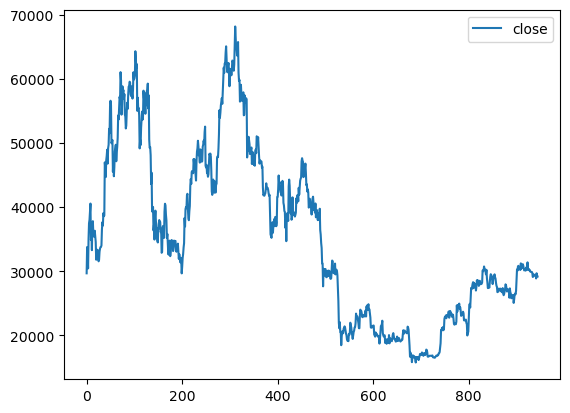

In [9]:
# Define DataFrame for BTC/USD
df = stocks['BTC/USD'][['date', 'close']]
df.plot()

In [10]:
# Scaling the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_values = scaler.fit_transform(np.array(df.sort_values(by='date', ascending=True)['close']).reshape(-1,1))

scaled_df = df.copy()
scaled_df['close'] = scaled_values
scaled_df

,date,close
0,2021-01-01T06:00:00Z,0.265365
1,2021-01-02T06:00:00Z,0.343524
2,2021-01-03T06:00:00Z,0.327072
3,2021-01-04T06:00:00Z,0.279970
4,2021-01-05T06:00:00Z,0.368226
...,...,...
940,2023-07-30T05:00:00Z,0.260790
941,2023-07-31T05:00:00Z,0.250149
942,2023-08-01T05:00:00Z,0.265498
943,2023-08-02T05:00:00Z,0.255723


In [11]:
# Split train and test data without shuffle
train_df, test_df = train_test_split(scaled_df, test_size=0.2, shuffle=False)
train_df

,date,close
0,2021-01-01T06:00:00Z,0.265365
1,2021-01-02T06:00:00Z,0.343524
2,2021-01-03T06:00:00Z,0.327072
3,2021-01-04T06:00:00Z,0.279970
4,2021-01-05T06:00:00Z,0.368226
...,...,...
751,2023-01-22T06:00:00Z,0.132427
752,2023-01-23T06:00:00Z,0.140018
753,2023-01-24T06:00:00Z,0.131634
754,2023-01-25T06:00:00Z,0.140682


In [12]:
# Set up the train rolling window for the LSTM
x_train = []
y_train = []

for i in range(30, len(train_df)):
    x_train.append(train_df.iloc[i-30:i]['close'])
    y_train.append(train_df.iloc[i]['close'])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [13]:
# Set up the test rolling window for the LSTM
x_test = []
y_test = []

for i in range(30, len(test_df)):
    x_test.append(test_df.iloc[i-30:i]['close'])
    y_test.append(test_df.iloc[i]['close'])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [14]:
# Define model
model = keras.Sequential()
model.add(layers.LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(64, return_sequences=False))
model.add(layers.Dense(32))
model.add(layers.Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 128)           66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 118,081
Trainable params: 118,081
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Compile model and fit to train data
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size= 1, epochs=3)

Epoch 1/3
726/726 [==============================] - 29s 27ms/step - loss: 0.0069
Epoch 2/3
726/726 [==============================] - 20s 28ms/step - loss: 0.0029
Epoch 3/3
726/726 [==============================] - 19s 27ms/step - loss: 0.0022


5/5 [==============================] - 2s 28ms/step


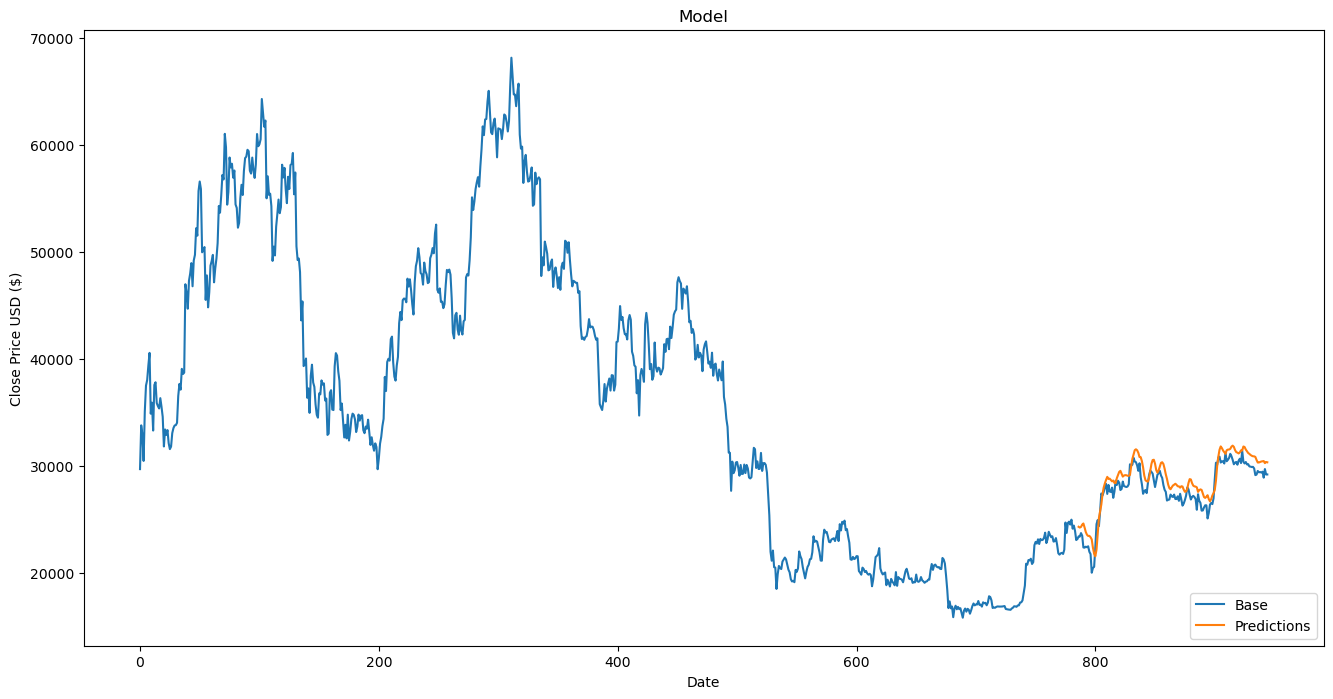

In [16]:
# Plot results
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
validation = test_df[30:].copy()
validation['predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(df['close'])
plt.plot(validation[['predictions']])
plt.legend(['Base', 'Predictions'], loc='lower right')
plt.show()

## Back to reality

#### The first algorithm is more accurate but much slower

In [ ]:
import numpy as np
import pandas as pd
from tqdm import trange
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Create a time series
df_train = df.iloc[:-100].copy()
time_series = np.array(df_train['close'])

# Normalization
scaler = MinMaxScaler(feature_range=(0, 1))
normalized_series = scaler.fit_transform(time_series.reshape(-1, 1))

# Training data
lookback = 30
X_train, y_train = [], []
for i in range(len(normalized_series) - lookback):
    X_train.append(normalized_series[i:i+lookback, 0])
    y_train.append(normalized_series[i+lookback, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Test data
last_instances = normalized_series[-lookback:]
X_test = np.array([last_instances])
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Prediction
predicted_values = []

for i in trange(100):
    model = Sequential()
    model.add(LSTM(128, input_shape=(lookback, 1)))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(X_train, y_train, epochs=1, batch_size=1, verbose=0)
    predicted_value = model.predict(X_test)
    X_test = np.reshape(np.array([np.concatenate((X_test.reshape(lookback,)[1:], predicted_value[0])).reshape(-1, 1)]), (X_test.shape[0], X_test.shape[1], 1))
    predicted_values.append(scaler.inverse_transform(predicted_value)[0][0])

print("Predicted values:", predicted_values)

#### Less accurate but much faster !

In [17]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

df_train = df.iloc[:-100].copy()

# Création d'une série temporelle fictive
time_series = np.array(df_train['close'])

# Normalisation de la série temporelle
scaler = MinMaxScaler(feature_range=(0, 1))
normalized_series = scaler.fit_transform(time_series.reshape(-1, 1))

# Préparation des données d'entraînement
lookback = 30  # Nombre d'instants de temps antérieurs à utiliser pour la prédiction
X_train, y_train = [], []
for i in range(len(normalized_series) - lookback):
    X_train.append(normalized_series[i:i+lookback, 0])
    y_train.append(normalized_series[i+lookback, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Remodelage des données pour l'entrée dans le LSTM (batch_size, timesteps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Construction du modèle LSTM
model = Sequential()
model.add(LSTM(128, input_shape=(lookback, 1)))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='mean_squared_error', optimizer='adam')

# Entraînement du modèle
model.fit(X_train, y_train, epochs=5, batch_size=1, verbose=1)

# Préparation des données de test (derniers instants de temps de la série)
last_instances = normalized_series[-lookback:]
X_test = np.array([last_instances])
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Prédiction des prochaines valeurs
predicted_values = []

for i in range(100):
    predicted_value = model.predict(X_test)
    print(predicted_value)
    X_test = np.reshape(np.array([np.concatenate((X_test.reshape(lookback,)[1:], predicted_value[0])).reshape(-1, 1)]), (X_test.shape[0], X_test.shape[1], 1))
    predicted_values.append(scaler.inverse_transform(predicted_value)[0][0])

print("Valeurs prédites:", predicted_values)

Epoch 1/5
815/815 [==============================] - 18s 17ms/step - loss: 0.0135
Epoch 2/5
815/815 [==============================] - 14s 17ms/step - loss: 0.0032
Epoch 3/5
815/815 [==============================] - 13s 16ms/step - loss: 0.0020
Epoch 4/5
815/815 [==============================] - 14s 17ms/step - loss: 0.0016
Epoch 5/5
1/1 [==============================] - 1s 1s/step
[[0.19760424]]
1/1 [==============================] - 0s 64ms/step
[[0.18683632]]
1/1 [==============================] - 0s 47ms/step
[[0.17262949]]
1/1 [==============================] - 0s 55ms/step
[[0.1581425]]
1/1 [==============================] - 0s 51ms/step
[[0.14498104]]
1/1 [==============================] - 0s 64ms/step
[[0.13368747]]
1/1 [==============================] - 0s 67ms/step
[[0.12423132]]
1/1 [==============================] - 0s 66ms/step
[[0.11635419]]
1/1 [==============================] - 0s 74ms/step
[[0.10975722]]
1/1 [==============================] - 0s 53ms/step
[[0.104181

#### Plot results

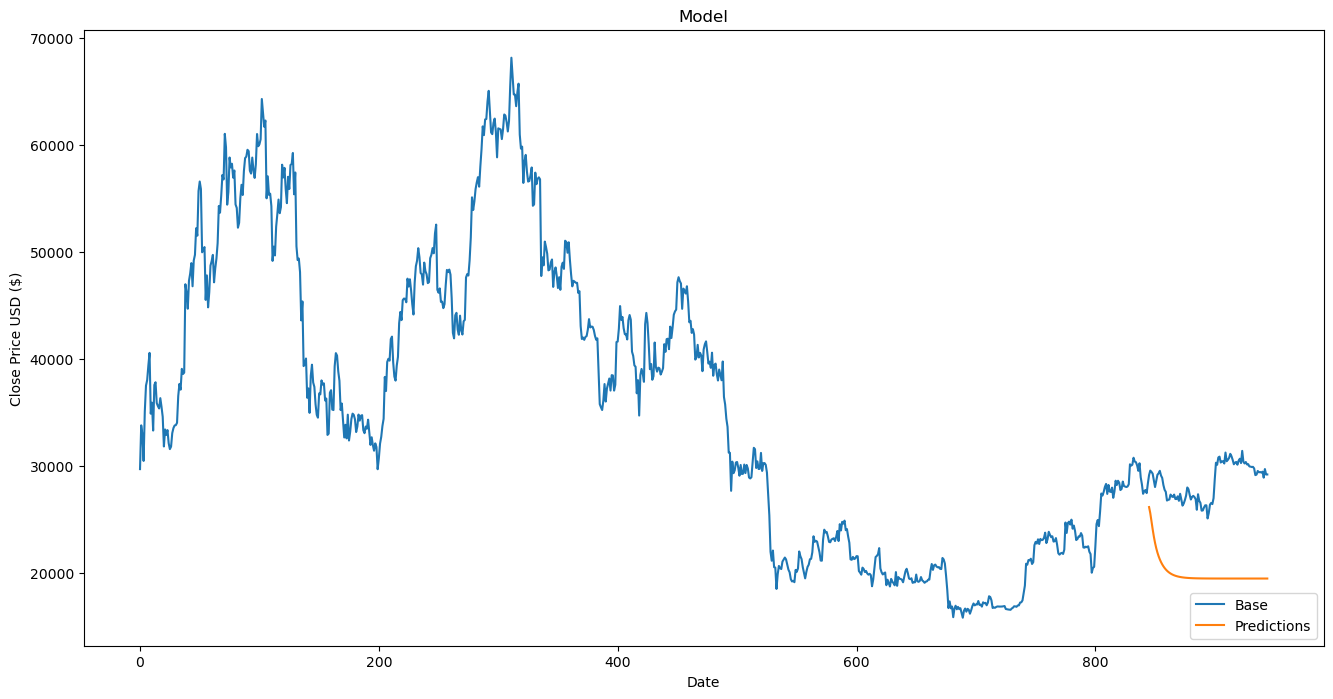

In [18]:
validation = pd.DataFrame(index=[k for k in range(len(df_train['close']), len(df_train['close'])+len(predicted_values))])
validation['predictions'] = predicted_values
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(df['close'])
plt.plot(validation[['predictions']])
plt.legend(['Base', 'Predictions'], loc='lower right')
plt.show()